In [1]:
import imageio
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
img = imageio.imread('test.png') / 255.

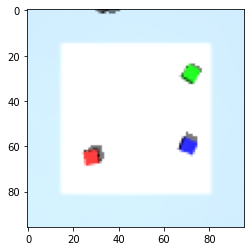

In [4]:
plt.imshow(img)

In [5]:
def mask_over(im, threshold):
    return (im >= threshold).all(-1)

def mask_under(im, threshold):
    return (im <= threshold).all(-1)

def mask_equal(im, threshold):
    return (im == threshold).all(-1)

In [6]:
img[3,3]

Array([0.81960784, 0.93333333, 1.        ])

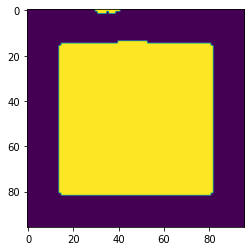

In [7]:
seg_workspace = 1-np.all([mask_over(img, [0.81, 0.92, 0.98]), mask_under(img, [0.86, 0.98, 1.])], 0)
plt.imshow(seg_workspace)

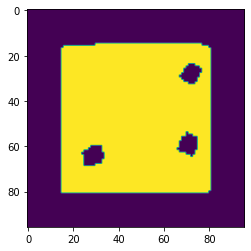

In [8]:
seg_white = mask_over(img, [.97, .97, .97])
# seg_white = mask_equal(img, [1., 1., 1.])
plt.imshow(seg_white)

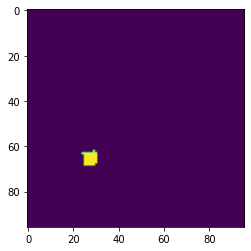

In [9]:
seg_red = np.all([mask_over(img, [.9, 0., 0.]), mask_under(img, [1., 0.9, 0.9])], 0)
# seg_red = mask_over(img, [.97, .1, .1])
plt.imshow(seg_red)

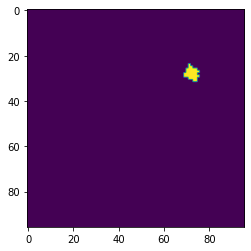

In [10]:
seg_green = np.all([mask_over(img, [0., .9, 0.]), mask_under(img, [0.9, 1., 0.9])], 0)
plt.imshow(seg_green)

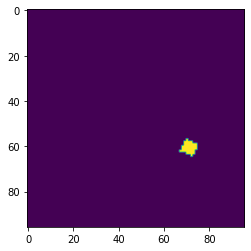

In [11]:
seg_blue = np.all([mask_over(img, [0., 0., 0.9]), mask_under(img, [0.9, 0.9, 1.])], 0)
plt.imshow(seg_blue)

### SDF generation

In [12]:
!pip install scikit-fmm

In [13]:
import skfmm

In [14]:
x = seg_red.astype(int) - 0.5

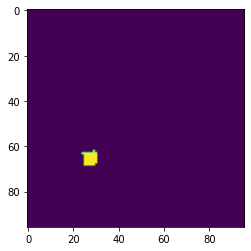

In [15]:
plt.imshow(x)

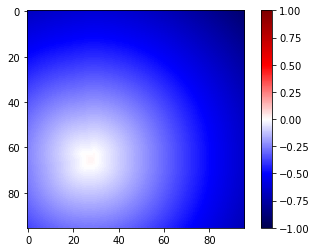

In [16]:
sd = skfmm.distance(x, dx=1) / 100

im = plt.imshow(sd, cmap='seismic', vmin=-1.0, vmax=1.0)
plt.colorbar(im)
plt.show()

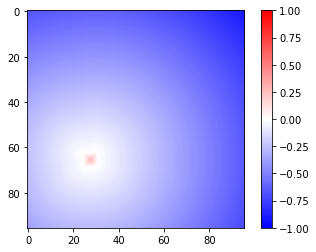

In [17]:
sd = skfmm.distance(x, dx=1) / 100
sd[sd>0] *= 10

im = plt.imshow(sd, cmap='bwr', vmin=-1.0, vmax=1.0)
plt.colorbar(im)
plt.show()

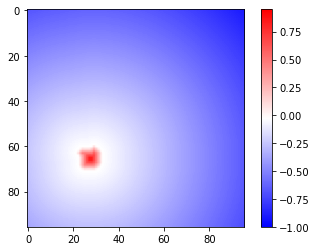

In [18]:
x = seg_red.astype(int) - 0.5
sd = skfmm.distance(x, dx=1) / 100
sd[sd>-0.02] = (sd[sd>-0.02] + 0.02) * 20 - 0.02

im = plt.imshow(sd, cmap='bwr', vmin=-1.0, vmax=0.95)
plt.colorbar(im)
plt.show()

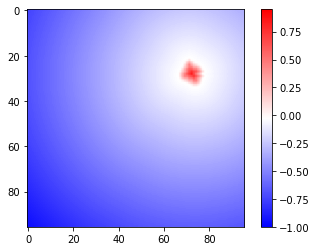

In [19]:
x = seg_green.astype(int) - 0.5
sd = skfmm.distance(x, dx=1) / 100
sd[sd>-0.02] = (sd[sd>-0.02] + 0.02) * 20 - 0.02

im = plt.imshow(sd, cmap='bwr', vmin=-1.0, vmax=0.95)
plt.colorbar(im)
plt.show()

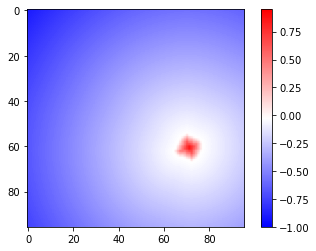

In [20]:
x = seg_blue.astype(int) - 0.5
sd = skfmm.distance(x, dx=1) / 100
sd[sd>-0.02] = (sd[sd>-0.02] + 0.02) * 20 - 0.02

im = plt.imshow(sd, cmap='bwr', vmin=-1.0, vmax=0.95)
plt.colorbar(im)
plt.show()

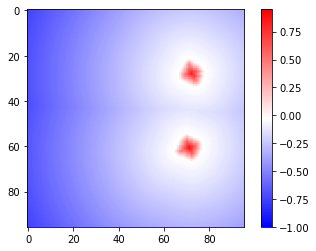

In [25]:
x = seg_blue.astype(int) + seg_green.astype(int) - 0.5
sd = skfmm.distance(x, dx=1) / 100
sd[sd>-0.02] = (sd[sd>-0.02] + 0.02) * 20 - 0.02

im = plt.imshow(sd, cmap='bwr', vmin=-1.0, vmax=0.95)
plt.colorbar(im)
plt.show()

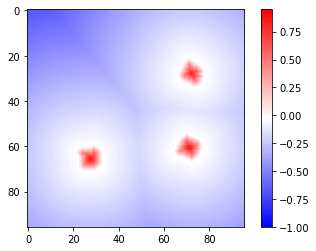

In [27]:
x = seg_blue.astype(int) + seg_green.astype(int) + seg_red.astype(int) - 0.5
sd = skfmm.distance(x, dx=1) / 100
sd[sd>-0.02] = (sd[sd>-0.02] + 0.02) * 20 - 0.02

im = plt.imshow(sd, cmap='bwr', vmin=-1.0, vmax=0.95)
plt.colorbar(im)
plt.show()

In [93]:
sd.max()

0.8490428575026518

In [95]:
[px], [py] = np.where(sd==sd.max())

In [98]:
sd[px, py]

0.8490428575026518

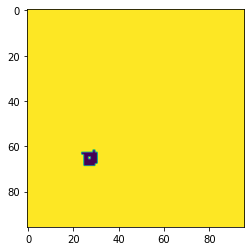

In [38]:
plt.imshow((sd==sd.max()) + (sd<0))

In [19]:
sd.max()

2.3030675827630693

In [20]:
sd.min()

-90.01276918865092

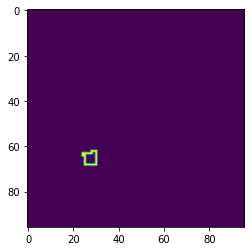

In [27]:
plt.imshow((sd<1)&(sd>-0.5))

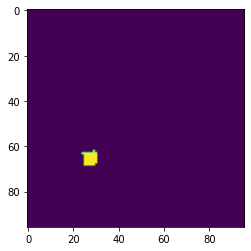

In [24]:
plt.imshow((sd>-0.01))

In [42]:
seg_green = np.all([mask_over(img, [0., .9, 0.]), mask_under(img, [0.9, 1., 0.9])], 0)
y = seg_green.astype(int) - 0.5

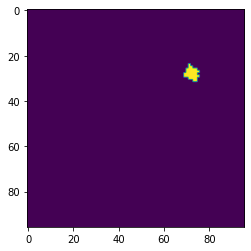

In [43]:
plt.imshow(y)

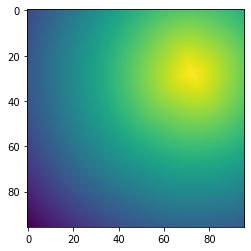

In [44]:
sd_g = skfmm.distance(y, dx=1)
plt.imshow(sd_g)

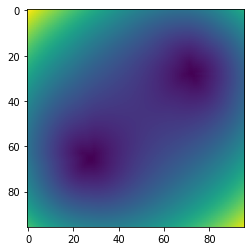

In [53]:
plt.imshow(sd * sd_g)

In [54]:
(sd * sd_g).sum()

13283790.977987256

In [55]:
(sd * sd).sum()

17944258.121610723

In [56]:
(sd_g * sd_g).sum()

20370552.197823122

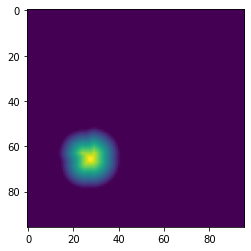

In [59]:
plt.imshow(sd.clip(-10, 10))

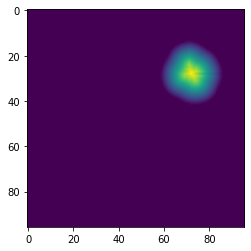

In [60]:
plt.imshow(sd_g.clip(-10, 10))

In [61]:
(sd.clip(-10, 10) * sd_g.clip(-10, 10)).sum()

869076.3330945636

In [62]:
(sd_g.clip(-10, 10) * sd_g.clip(-10, 10)).sum()

886872.6949307

In [15]:
x, y = np.where(seg_red)
print(x.mean())
print(y.mean())

65.27027027027027
27.37837837837838


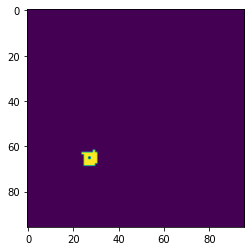

In [18]:
seg_red[np.int(x.mean()), np.int(y.mean())] = 0
plt.imshow(seg_red)

In [ ]:
seg_red

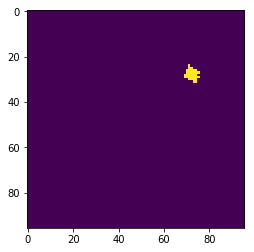

In [101]:
seg_green = np.all([mask_over(img, [0., .9, 0.]), mask_under(img, [0.9, 1., 0.9])], 0)
plt.imshow(seg_green)

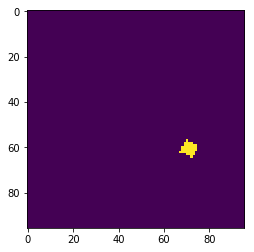

In [103]:
seg_blue = np.all([mask_over(img, [0., 0., 0.9]), mask_under(img, [0.9, 0.9, 1.])], 0)
plt.imshow(seg_blue)

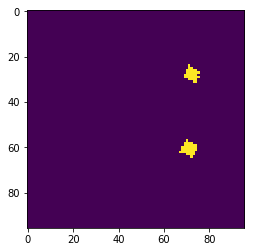

In [164]:
plt.imshow(np.any([seg_green, seg_blue], 0))

In [161]:
seg_green.shape

(96, 96)

In [162]:
seg_blue.shape

(96, 96)

In [166]:
np.concatenate([seg_red.squeeze(0), seg_red.squeeze(0)])

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [168]:
seg_red.expand_dim

AttributeError: 'numpy.ndarray' object has no attribute 'expand_dim'

In [171]:
np.expand_dims(seg_red, 0).shape

(1, 96, 96)

In [1]:
from segmentation_env import *

env = UR5Env(render=True, camera_height=96, camera_width=96, control_freq=5, data_format='NHWC', xml_ver=0)
env = segmentation_env(env, num_blocks=3, mov_dist=0.05, max_steps=100, reward_type='new')
env.set_targets([2])

Creating window glfw


In [2]:
s = env.reset()

In [3]:
s[0].shape

(4, 96, 96)

In [4]:
s[1].shape

(3, 96, 96)

In [14]:
s[0].transpose([1,2,0]).shape

(96, 96, 4)

In [21]:
np.random.randint(3)

1

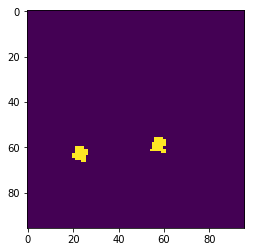

In [25]:
plt.imshow(np.any([s[0][0], s[0][1]], 0))

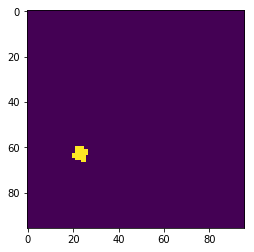

In [5]:
plt.imshow(s[0][0])

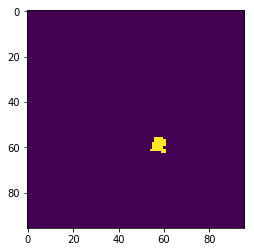

In [6]:
plt.imshow(s[0][1])

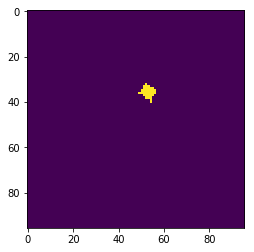

In [7]:
plt.imshow(s[0][2])

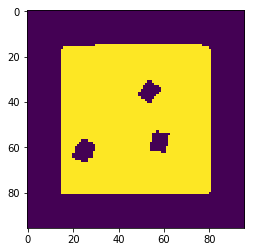

In [8]:
plt.imshow(s[0][3])

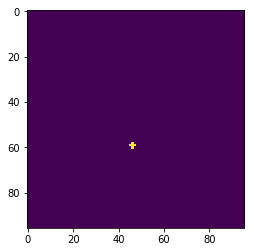

In [9]:
plt.imshow(s[1][0])

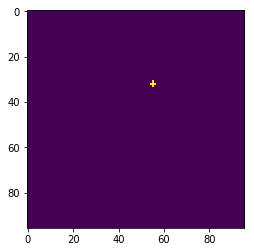

In [10]:
plt.imshow(s[1][1])

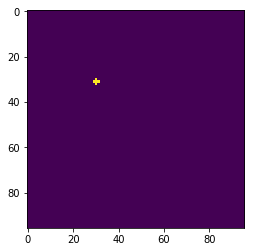

In [11]:
plt.imshow(s[1][2])